No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[111.03333333 110.96666667 104.8         99.53333333  94.66666667
  91.9         87.56666667  83.9         79.5         75.96666667
  73.9         70.2         70.33333333  67.73333333  65.8
  62.56666667  61.06666667]


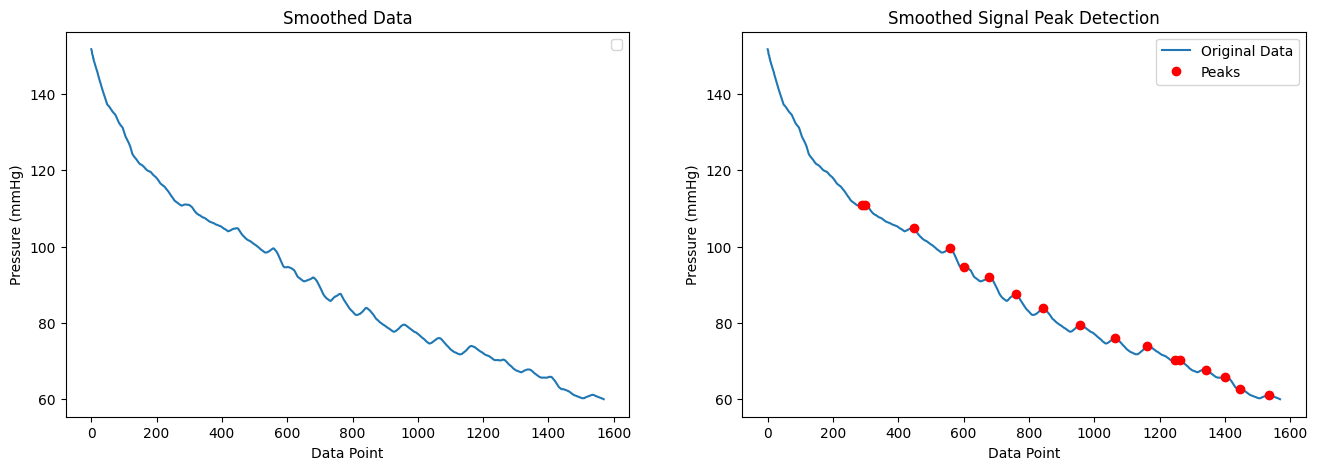

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.signal import butter, filtfilt, hilbert
from scipy.optimize import curve_fit

#Trial #5
#deflation_values = [154,154,154,153,153,153,153,153,153,153,153,153,153,153,153,153,152,152,152,152,152,152,152,152,152,152,152,152,151,151,151,151,151,151,151,151,151,151,151,151,150,151,150,150,150,150,150,150,150,150,150,150,150,150,150,150,149,149,149,149,149,149,149,149,149,149,149,149,149,149,148,149,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,145,145,145,145,145,145,145,145,145,145,144,144,144,144,144,144,144,144,144,144,144,144,144,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,142,142,142,142,142,142,142,142,142,142,142,142,142,141,141,141,141,141,141,141,141,141,141,141,141,141,140,140,141,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,138,139,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,137,138,137,137,137,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,137,137,137,137,137,137,137,137,137,137,137,137,136,137,136,136,136,136,136,136,136,136,136,136,136,136,136,135,135,136,135,135,135,135,135,135,135,135,135,135,135,135,135,135,135,135,135,135,135,135,135,135,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,131,131,131,131,131,131,131,131,131,131,131,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,126,127,127,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,126,126,126,126,126,126,126,126,126,126,126,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,124,125,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,122,122,122,122,123,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,123,123,123,123,123,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124,123,123,123,123,123,123,123,123,123,123,123,123,123,123,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,121,122,122,122,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,120,120,120,121,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,119,120,120,119,120,120,120,120,120,120,120,120,119,120,120,120,120,120,120,120,120,120,120,119,120,120,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,118,118,118,119,118,119,119,119,119,119,119,119,119,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,119,119,119,119,119,119,119,119,119,118,118,118,118,118,118,118,118,118,118,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,116,117,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,112,113,113,113,113,113,112,113,113,112,113,112,112,113,113,113,113,113,113,113,113,113,113,113,113,113,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,113,113,113,113,113,113,113,113,113,113,113,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,111,111,111,112,112,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,109,110,109,110,110,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,108,108,108,108,108,108,108,108,108,108,108,108,108,109,109,109,109,109,109,109,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,107,108,107,108,107,107,108,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,104,105,104,104,104,104,105,105,104,104,105,105,105,105,105,105,105,106,106,106,106,106,106,106,106,106,106,107,107,107,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,105,105,105,105,105,105,105,105,105,105,105,105,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,102,103,103,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,101,102,102,102,102,102,101,102,102,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,102,102,102,102,102,102,102,103,103,103,103,103,103,103,103,103,103,103,103,103,103,102,103,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,98,98,99,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,97,97,97,97,97,97,97,97,97,97,97,97,97,97,98,98,98,98,98,98,99,99,99,99,99,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,99,99,99,99,99,99,99,99,99,99,99,99,98,98,98,98,98,98,98,98,98,98,98,98,98,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,95,95,95,95,95,96,96,96,96,96,96,96,96,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,96,96,96,96,96,96,96,96,96,96,96,96,96,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,92,92,92,92,93,93,93,93,93,93,93,93,93,93,93,94,93,94,94,94,94,94,93,94,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,89,89,89,89,89,90,90,90,90,90,90,90,91,90,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,89,89,89,89,89,89,89,89,89,89,89,89,89,88,89,89,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,87,88,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,85,85,85,85,85,85,85,85,85,85,85,86,86,86,86,86,87,87,87,87,87,87,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,85,86,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,83,83,84,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,84,84,84,84,85,85,85,85,85,85,85,85,85,86,86,85,86,86,86,85,86,86,86,86,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,84,85,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,83,84,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,80,80,80,81,81,81,81,81,81,81,82,82,82,82,82,82,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,79,79,79,79,79,80,80,80,80,80,80,80,80,81,80,81,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,79,80,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,78,79,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,77,77,77,77,77,77,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,77,77,78,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,74,74,74,75,75,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,75,75,75,75,75,75,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,74,75,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,73,74,74,74,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,74,74,74,74,74,74,74,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,72,73,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,71,71,71,71,71,71,71,71,71,71,71,71,72,72,72,72,72,72,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,72,72,72,73,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,71,72,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,69,70,69,70,70,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,70,70,70,70,70,70,70,70,70,70,71,70,70,70,70,70,70,70,70,70,71,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,68,68,69,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,68,68,68,68,68,68,68,68,68,69,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,66,66,66,66,66,66,66,66,67,66,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,66,66,66,67,67,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,64,65,65,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,63,63,63,63,63,63,63,63,64,64,64,64,64,64,64,64,64,65,64,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,64,65,65,65,65,64,65,64,65,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,62,63,62,62,63,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,61,62,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,60,61,60,60,60,60,60,60,60,60,60,60,60,60,60,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,60,60,61,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,59,59,59,59,59,59,59,59,59,59,59,59,60,60,60,60,60,60,60]

deflation_values = [153,159,166,153,152,166,148,163,150,153,153,153,152,152,152,152,152,152,151,151,148,147,147,147,147,147,147,147,147,147,146,146,146,146,146,146,146,145,144,144,144,144,144,144,144,144,144,144,143,139,138,138,138,138,138,138,138,138,138,138,138,138,138,137,138,137,137,137,137,137,137,136,136,136,136,136,136,136,136,136,136,136,135,135,135,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,133,133,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,131,131,131,131,131,131,131,126,126,126,126,125,125,125,125,125,125,125,125,125,125,125,125,125,125,124,124,124,124,123,123,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,120,120,120,120,120,119,119,119,119,119,119,119,119,119,119,119,119,119,119,120,120,120,120,120,120,120,121,118,118,117,117,117,117,117,117,117,117,117,117,117,117,117,117,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,115,115,115,115,115,115,115,115,115,114,115,113,113,113,113,113,113,113,113,113,113,112,112,112,112,112,112,112,112,112,112,112,112,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,110,110,110,110,110,110,110,111,111,111,111,111,111,111,112,112,112,112,112,112,112,112,111,111,111,111,111,111,110,110,110,110,110,110,109,109,109,109,109,109,109,109,109,109,109,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,106,107,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,104,104,104,104,104,104,104,104,104,104,104,104,104,103,103,103,103,103,103,103,103,104,106,106,106,106,106,106,106,106,106,106,106,105,105,105,105,105,105,105,104,104,104,104,104,104,103,103,103,103,103,103,103,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,99,99,99,99,99,99,99,99,99,99,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,98,99,99,99,99,99,99,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,99,99,99,99,97,96,96,96,96,96,96,96,96,96,96,95,95,95,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,93,93,96,96,96,96,96,96,96,96,96,96,96,93,93,93,93,93,93,93,93,93,93,93,92,92,92,92,92,92,92,92,92,91,92,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,90,90,90,90,90,91,91,91,91,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,90,90,90,90,90,89,89,89,89,89,89,88,87,87,88,87,87,87,87,87,87,87,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,85,85,85,85,85,85,85,86,86,86,86,86,89,89,89,89,89,89,89,89,88,88,88,88,88,87,87,87,87,87,87,87,87,87,87,87,87,87,86,86,86,86,84,84,84,84,84,84,84,84,84,84,84,84,83,84,83,83,83,83,83,83,83,83,83,83,83,83,83,83,82,83,82,82,82,82,81,81,81,81,81,81,81,81,81,81,82,82,82,83,83,83,83,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,85,84,84,84,84,84,84,84,84,83,82,82,82,82,82,82,82,82,82,82,81,81,81,81,81,81,81,81,81,81,81,81,80,80,80,80,80,80,80,80,80,80,80,80,80,80,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,78,78,78,78,78,78,78,78,78,78,78,78,78,78,77,77,77,77,77,77,77,77,77,77,77,78,78,78,78,78,79,79,79,79,79,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,79,79,79,79,79,79,79,79,79,79,79,79,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,76,76,76,76,76,76,76,76,76,76,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,74,74,74,74,74,74,74,74,74,74,74,74,74,75,75,75,75,76,76,76,76,76,77,77,77,77,77,77,77,77,76,76,76,76,76,76,76,76,75,75,75,75,75,75,75,75,75,75,75,74,74,74,74,74,74,74,74,74,74,74,73,73,73,73,73,73,73,73,73,73,73,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,71,72,71,71,71,71,71,71,71,72,72,72,72,72,73,73,73,74,74,74,74,74,74,74,74,74,74,75,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,73,73,73,73,73,73,73,73,73,73,73,73,73,73,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,70,70,70,70,70,70,69,69,69,69,69,69,69,70,70,70,70,71,71,71,71,71,71,71,71,71,71,71,70,70,70,70,70,70,70,70,70,70,70,70,70,70,69,69,69,69,69,69,69,69,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,68,68,68,68,68,69,69,69,68,68,68,68,68,68,68,68,68,68,68,67,67,67,67,67,67,67,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,65,65,65,65,65,65,65,65,65,65,65,65,65,67,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,65,65,65,65,65,65,65,65,63,63,63,63,63,63,63,63,63,62,62,62,62,62,62,62,62,62,62,62,62,62,63,63,63,63,63,63,63,63,63,63,63,63,63,63,62,62,62,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,61,61,61,61,61,61,61,62,62,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,59,59

]

# Moving Average
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Example usage:
# Replace the following data with your own signal

# Set the window size for the moving average
window_size = 30  # Adjust based on the desired smoothing level

# Apply moving average
smoothed_deflation_signal = moving_average(deflation_values, window_size)

# Set the threshold for peak detection
threshold = 3.0  # Adjust based on the characteristics of your data

deflation_pressure_data = smoothed_deflation_signal

# Find peaks in the data
peaks, _ = find_peaks(deflation_pressure_data, height=threshold)

print(deflation_pressure_data[peaks])

#Plot Results
plt.figure(figsize=(16,5))

# Plot the results
plt.subplot(1,2,1)
plt.plot(deflation_pressure_data)
plt.xlabel('Data Point')
plt.ylabel('Pressure (mmHg)')
plt.title("Smoothed Data")
plt.legend()

plt.subplot(1,2,2)
plt.plot(deflation_pressure_data, label='Original Data')
plt.plot(peaks, deflation_pressure_data[peaks], 'ro', label='Peaks')
plt.xlabel('Data Point')
plt.ylabel('Pressure (mmHg)')
plt.title("Smoothed Signal Peak Detection")
plt.legend()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


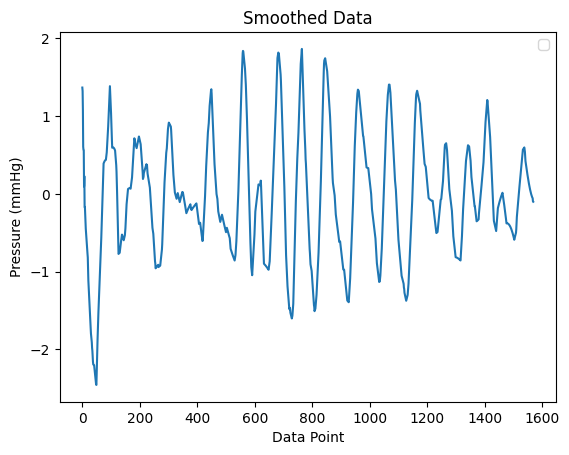

In [75]:
from scipy.signal import butter, filtfilt

def high_pass_filter(data, fs=100, cutoff=0.5):
    # Normalize the cutoff frequency to Nyquist frequency
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist

    # Design the high-pass filter
    b, a = butter(4, normal_cutoff, btype='high', analog=False)

    # Apply the filter to the data
    filtered_data = filtfilt(b, a, data)

    return filtered_data

filtered_deflation = high_pass_filter(deflation_pressure_data)

plt.subplot(1,1,1)
plt.plot(filtered_deflation)
plt.xlabel('Data Point')
plt.ylabel('Pressure (mmHg)')
plt.title("Smoothed Data")
plt.legend()



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[1.57333707 1.59573722 1.61404936 ... 0.32848432 0.32873189 0.32904337]
[  25.   26.   27. ... 1543. 1544. 1545.]
Maximum Indices Raw: [  96.  299.  449.  559.  682.  764.  959. 1067. 1266. 1409.]
Max Pressures: [131.23333333 110.93333333 104.76666667  99.5         91.8
  87.56666667  79.5         75.96666667  70.2         65.8       ]
MAP: 131.23333333333326 mmHg


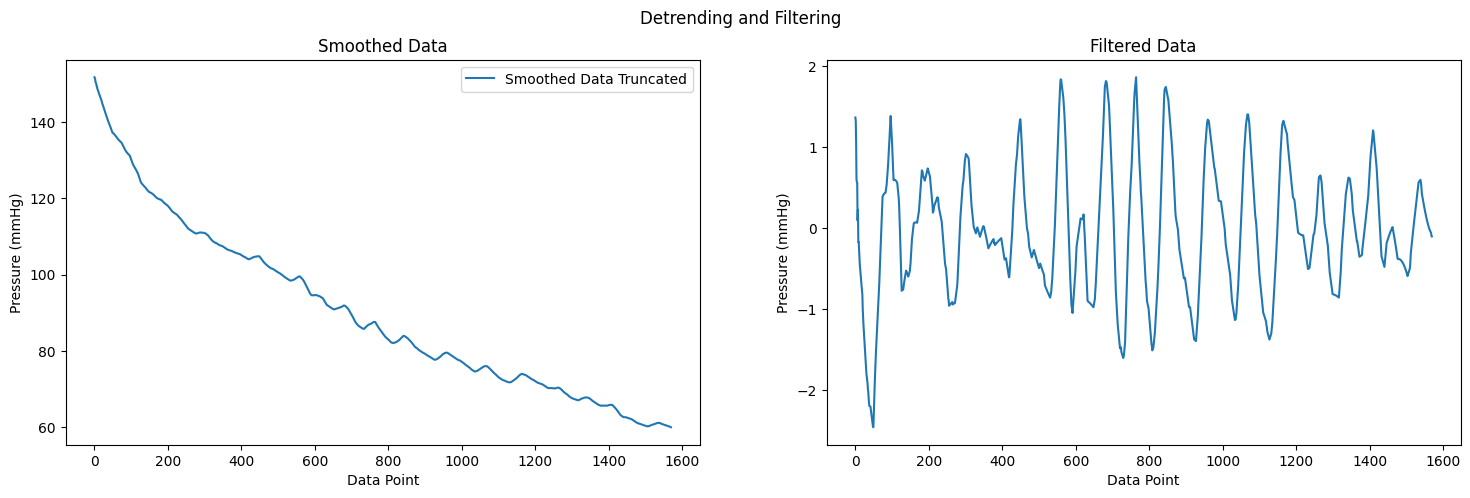

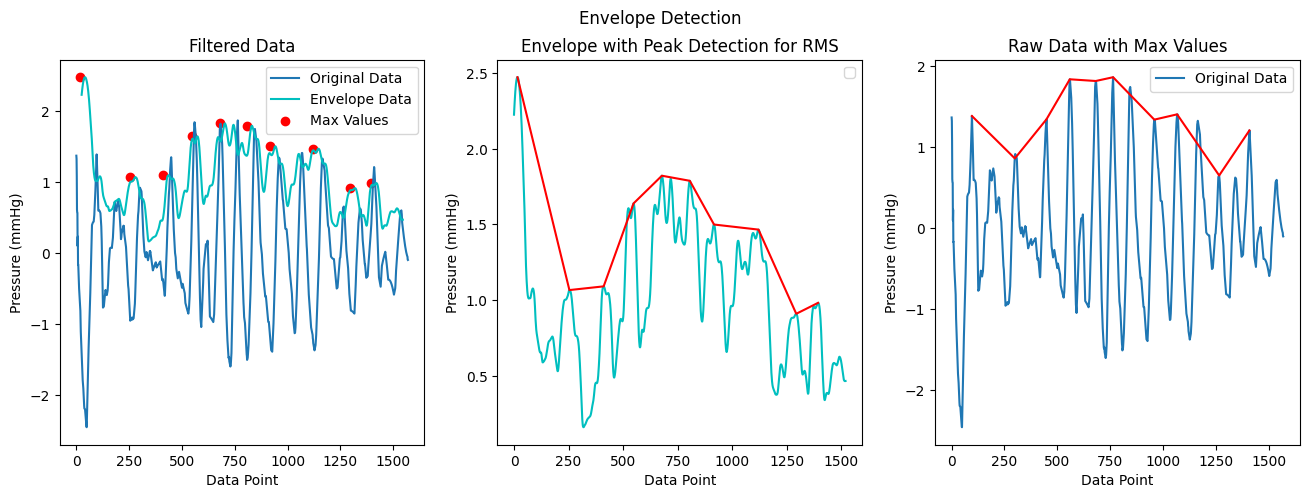

Length Raw Data: 1599
Length Smoothed Data (LPF): 1570
Length Filtered Data: 1570
Length Envelope Data: 10


In [76]:
#RMS Calculation
def calculate_rms_with_overlap(data, window_size, overlap):
    step_size = window_size - overlap
    num_windows = (len(data) - window_size) // step_size + 1

    # Initialize an array to store the RMS values
    rms_values = np.zeros(num_windows)
    indices = []
    rms = []

    # Calculate RMS for each window with overlap
    for i in range(num_windows):
        window_start = i * step_size
        window_end = window_start + window_size
        window_data = data[window_start:window_end]
        rms_values[i] = np.sqrt(np.mean(window_data**2))

        rms.append(rms_values[i])
        indices.append(((window_end-window_start)/2)+i)

    return rms_values, np.array(indices), np.array(rms)

# Example usage
window_size = 50
overlap = 49  # Adjust overlap as needed

rms_values, indices, rms = calculate_rms_with_overlap(filtered_deflation, window_size, overlap)

print(rms)
print(indices)

envelope = rms*np.sqrt(2.0)

#Peak Detection Again
def find_max_in_blocks(data, block_size):
    num_blocks = len(data) // block_size

    # Initialize an array to store the maximum values
    max_values = np.zeros(num_blocks)
    max_indices = np.zeros(num_blocks)

    # Find the maximum value in each block
    for i in range(num_blocks):
        block_start = i * block_size
        block_end = (i + 1) * block_size
        block_data = data[block_start:block_end]
        max_values[i] = np.max(block_data)
        max_index_in_block = np.argmax(block_data)
        max_indices[i] = block_start + max_index_in_block

    return max_values, max_indices

def find_troughs_in_blocks(data, block_size):
    num_blocks = len(data) // block_size

    # Initialize an array to store the maximum values
    min_values = np.zeros(num_blocks)
    min_indices = np.zeros(num_blocks)

    # Find the maximum value in each block
    for i in range(num_blocks):
        block_start = i * block_size
        block_end = (i + 1) * block_size
        block_data = data[block_start:block_end]
        min_values[i] = np.min(block_data)
        min_index_in_block = np.argmin(block_data)
        min_indices[i] = block_start + min_index_in_block

    return min_values, min_indices

block_size = 150 # Adjust block size as needed

max_values_rms, max_indices_rms = find_max_in_blocks(envelope, block_size)
max_values_raw, max_indices_raw = find_max_in_blocks(filtered_deflation, block_size)
min_values_raw, min_indices_raw = find_troughs_in_blocks(filtered_deflation, block_size)

peaktopeak_values = max_values_raw - min_values_raw

max_pressures = np.zeros(len(max_values_raw))

for i in range(len(max_indices_raw)):
    current_index = int(max_indices_raw[i])
    max_pressures[i] = deflation_pressure_data[current_index] #we'll have to fix this later. The indexing for the algorithm stuff isn't what we expect. Need to clarify where the data should be truncated, what portion should be smoothed/filtered, etc.

print("Maximum Indices Raw:", max_indices_raw)
print("Max Pressures:", max_pressures)

map = np.max(max_pressures)

print("MAP:", map, "mmHg")

#Plot Raw Data and Detrending
plt.figure(figsize=(18,5))
plt.suptitle("Detrending and Filtering")

plt.subplot(1,2,1)
plt.plot(deflation_pressure_data, label='Smoothed Data Truncated')
plt.xlabel('Data Point')
plt.ylabel('Pressure (mmHg)')
plt.title("Smoothed Data")
plt.legend()

plt.subplot(1,2,2)
plt.plot(filtered_deflation)
plt.xlabel('Data Point')
plt.ylabel('Pressure (mmHg)')
plt.title("Filtered Data")

#Plot Filtering and Envelope Detection
plt.figure(figsize=(16,5))
plt.suptitle("Envelope Detection")

plt.subplot(1,3,1)
plt.plot(filtered_deflation, label='Original Data')
plt.plot(indices, envelope, color='c', label = "Envelope Data")
plt.scatter(max_indices_rms, max_values_rms, color="r", label = "Max Values")
plt.xlabel('Data Point')
plt.ylabel('Pressure (mmHg)')
plt.title("Filtered Data")
plt.legend()

plt.subplot(1,3,2)
plt.plot(envelope, color="c")
plt.plot(max_indices_rms, max_values_rms, color="r")
plt.xlabel('Data Point')
plt.ylabel('Pressure (mmHg)')
plt.title("Envelope with Peak Detection for RMS")
plt.legend()

plt.subplot(1,3,3)
plt.plot(filtered_deflation, label='Original Data')
plt.plot(max_indices_raw, max_values_raw, color="r")
plt.xlabel('Data Point')
plt.ylabel('Pressure (mmHg)')
plt.title("Raw Data with Max Values")
plt.legend()

plt.show()

print("Length Raw Data:", len(deflation_values))
print("Length Smoothed Data (LPF):", len(smoothed_deflation_signal))
print("Length Filtered Data:", len(filtered_deflation))
print("Length Envelope Data:", len(max_indices_raw))

max_indices_round = np.zeros(len(max_indices_raw))

for i in range(len(max_indices_raw)):
    max_indices_round[i] = int(max_indices_raw[i])

Length Smoothed Data: 1570
Length Time Array for Guassian: 1570
Max Positive Slope Pressure: 135.43333333333334
Max Negative Slope Pressure: 67.03333333333335


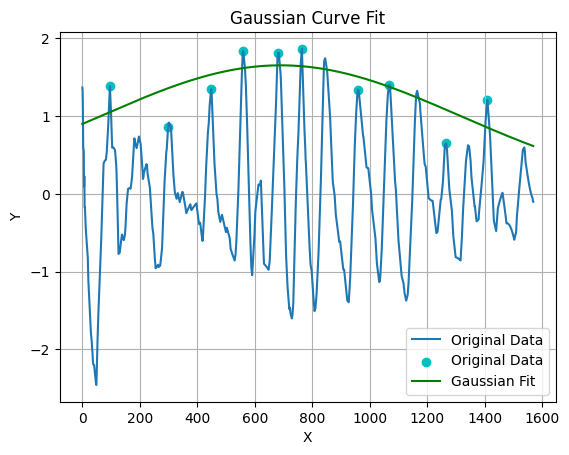

Optimal parameters:
Amplitude: 1.6533683428638337
Mean: 690.0880088170912
Standard Deviation: 625.1575477844434


In [77]:
#Curve fit for envelope

# Step 2: Define the Gaussian function
def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-((x - mean) / stddev)**2 / 2)

# Step 3: Use curve fitting to fit the Gaussian function to the data
popt, pcov = curve_fit(gaussian, max_indices_raw, max_values_raw, p0=[np.max(max_values_raw), np.mean(max_indices_raw), np.std(max_indices_raw)])

# Get the optimal parameters
amplitude_opt, mean_opt, stddev_opt = popt

time = np.arange(len(smoothed_deflation_signal))

# Generate the fitted curve
guassian_curve = gaussian(time, *popt)

slope = np.gradient(guassian_curve, time)

print("Length Smoothed Data:", len(smoothed_deflation_signal))
print("Length Time Array for Guassian:", len(time))

max_positive_slope_index = np.argmax(slope)
max_negative_slope_index = np.argmin(slope)

print("Max Positive Slope Pressure:", smoothed_deflation_signal[max_positive_slope_index])
print("Max Negative Slope Pressure:", smoothed_deflation_signal[max_negative_slope_index])

# Plot the original data and the fitted curve
plt.plot(filtered_deflation, label='Original Data')
plt.scatter(max_indices_raw, max_values_raw, label='Original Data', color = "c")
plt.plot(time, guassian_curve, color='g', label='Gaussian Fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gaussian Curve Fit')
plt.legend()
plt.grid(True)
plt.show()

print("Optimal parameters:")
print("Amplitude:", amplitude_opt)
print("Mean:", mean_opt)
print("Standard Deviation:", stddev_opt)